In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib

# matplotlib.rcParams.update({
#     "text.usetex": True,                # Use LaTeX for all text
#     "font.family": "serif",             # Use serif font
#     "font.serif": ["Charter"],
#     "text.latex.preamble": r"\usepackage{charter}",
#     "axes.labelsize": 20,      # Axis label font size (yours is 22)
#     "axes.titlesize": 18,      # Title font size (add this for plot title)
#     "font.size": 22,           # Default font size (yours is 12)
#     "legend.fontsize": 16,     # Legend font size (yours is 12)
#     "xtick.labelsize": 18,     # X tick labels
#     "ytick.labelsize": 18,     # Y tick labels
# })
matplotlib.rcParams.update({
    "text.usetex": True,                # Use LaTeX for all text
    "font.family": "serif",             # Use serif font
    "font.serif": ["Charter"],
    "text.latex.preamble": r"\usepackage{charter}",
    "axes.labelsize": 18,      # Axis label font size (yours is 22)
    "axes.titlesize": 18,      # Title font size (add this for plot title)
    "font.size": 16,           # Default font size (yours is 12)
    "legend.fontsize": 14,     # Legend font size (yours is 12)
    "xtick.labelsize": 16,     # X tick labels
    "ytick.labelsize": 16,     # Y tick labels
})

In [2]:
def plot_data(
    csv_file, columns, steps, xlabel, ylabel, title,
    log_scale=False, output='plot.png', percent_y=False
):
    # Define RGB colors
    color_list = [
        (0.96, 0, 0.42),      # pink
        (0.216, 0.522, 0.882),# blue
        (0.22, 0.827, 0.835)  # cyan
    ]

    df = pd.read_csv(csv_file, usecols=columns.keys())
    df.rename(columns=columns, inplace=True)

    columns = list(columns.values())

    for col in columns[1:]:
        df[f'{col}_avg'] = df[col].rolling(steps, min_periods=1).mean()

    fig, ax = plt.subplots(figsize=(10, 6))
    x = df[columns[0]]
    x = x/x[0]

    for idx, col in enumerate(columns[1:]):
        color = color_list[idx % len(color_list)]
        ax.plot(x, df[col], color=color, alpha=0.7, linewidth=1, linestyle='dotted', label=f'{col} -- Raw', zorder=1)
        ax.plot(x, df[f'{col}_avg'], color=color, alpha=1.0, linewidth=2, label=f'{col} -- Average', zorder=2)

    ax.set(xlabel=xlabel, ylabel=ylabel)
    if log_scale:
        ax.set_yscale('log')
    if percent_y:
        # Append % symbol to y-axis labels without changing values
        ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: r"${:.0f}\%$".format(y)))

    ax.legend()
    ax.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.savefig(output, format='pdf', transparent=True, bbox_inches='tight')
    plt.show()
    plt.close()


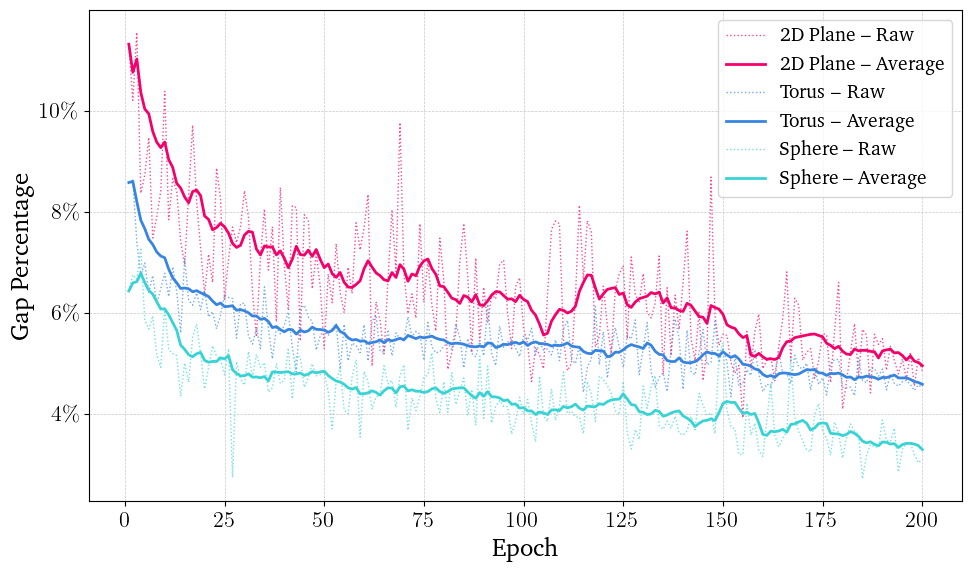

In [3]:
# steps = [200, 500, 1000]
steps = [100]
for step in steps:
    columns = {
        'Step': 'Step',
        f'decoder_2d_redone_small - test/{step}/gap_percentage': '2D Plane',
        f'decoder_torus_small - test/{step}/gap_percentage': 'Torus',
        f'decoder_sphere - test/{step}/gap_percentage': 'Sphere'
    }
    plot_data(
        csv_file=f'csv_files/percentages_{step}.csv',
        columns=columns,
        steps=10,
        xlabel='Epoch',
        ylabel='Gap Percentage',
        title=f'Testing Gaps for Instance Size -- {step}',
        log_scale=False,
        output=f'percentages/size_{step}.pdf',
        percent_y=True
    )